In [34]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
stocks = ['msft', 'aapl'] # stock names
start = '2024-03-23' # yyyy-mm-dd
end = '2025-03-23'

msft = yf.download('msft', start = start, end = end)
aapl = yf.download('aapl', start = start, end = end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [36]:
msft, aapl = msft['Close'], aapl['Close']

In [37]:
# Close Prices DataFrame is multi-indexed with stock_name and date
msft, aapl

(Ticker            MSFT
 Date                  
 2024-03-25  419.656036
 2024-03-26  418.455200
 2024-03-27  418.236908
 2024-03-28  417.532288
 2024-04-01  421.353119
 ...                ...
 2025-03-17  388.700012
 2025-03-18  383.519989
 2025-03-19  387.820007
 2025-03-20  386.839996
 2025-03-21  391.260010
 
 [249 rows x 1 columns],
 Ticker            AAPL
 Date                  
 2024-03-25  170.047073
 2024-03-26  168.912430
 2024-03-27  172.495499
 2024-03-28  170.674088
 2024-04-01  169.230927
 ...                ...
 2025-03-17  214.000000
 2025-03-18  212.690002
 2025-03-19  215.240005
 2025-03-20  214.100006
 2025-03-21  218.270004
 
 [249 rows x 1 columns])

In [61]:
def calculate_returns(prices):
    normal_returns = prices.pct_change() # normal returns are percentage changes in consecutive prices
    log_returns = np.log(prices / prices.shift(1)) # log returns are log(normal_returns)
    return normal_returns, log_returns

def calculate_volatility(returns):
    return returns.std() * np.sqrt(249) # volatility is multiplied by sqrt(no. of time periods)

def p_volatility(weights, returns):
    cov_matrix = returns.cov() * 249
    port_vol = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return port_vol

In [39]:
portfolio = pd.concat([msft, aapl], axis=1)
portfolio.columns = stocks

In [40]:
portfolio

,msft,aapl
Date,,
2024-03-25,419.656036,170.047073
2024-03-26,418.455200,168.912430
2024-03-27,418.236908,172.495499
2024-03-28,417.532288,170.674088
2024-04-01,421.353119,169.230927
...,...,...
2025-03-17,388.700012,214.000000
2025-03-18,383.519989,212.690002
2025-03-19,387.820007,215.240005


In [41]:
msft = portfolio[['msft']].copy()
aapl = portfolio[['aapl']].copy()

In [43]:
msft['normal_returns'] = msft['msft'].pct_change()
msft['log_returns'] = np.log(msft['msft'] / msft['msft'].shift(1))

aapl['normal_returns'] = aapl['aapl'].pct_change()
aapl['log_returns'] = np.log(aapl['aapl'] / aapl['aapl'].shift(1))

In [44]:
msft

,msft,normal_returns,log_returns
Date,,,
2024-03-25,419.656036,NaN,NaN
2024-03-26,418.455200,-0.002861,-0.002866
2024-03-27,418.236908,-0.000522,-0.000522
2024-03-28,417.532288,-0.001685,-0.001686
2024-04-01,421.353119,0.009151,0.009109
...,...,...,...
2025-03-17,388.700012,0.000360,0.000360
2025-03-18,383.519989,-0.013327,-0.013416
2025-03-19,387.820007,0.011212,0.011150


In [45]:
aapl

,aapl,normal_returns,log_returns
Date,,,
2024-03-25,170.047073,NaN,NaN
2024-03-26,168.912430,-0.006673,-0.006695
2024-03-27,172.495499,0.021213,0.020991
2024-03-28,170.674088,-0.010559,-0.010615
2024-04-01,169.230927,-0.008456,-0.008492
...,...,...,...
2025-03-17,214.000000,0.002389,0.002386
2025-03-18,212.690002,-0.006121,-0.006140
2025-03-19,215.240005,0.011989,0.011918


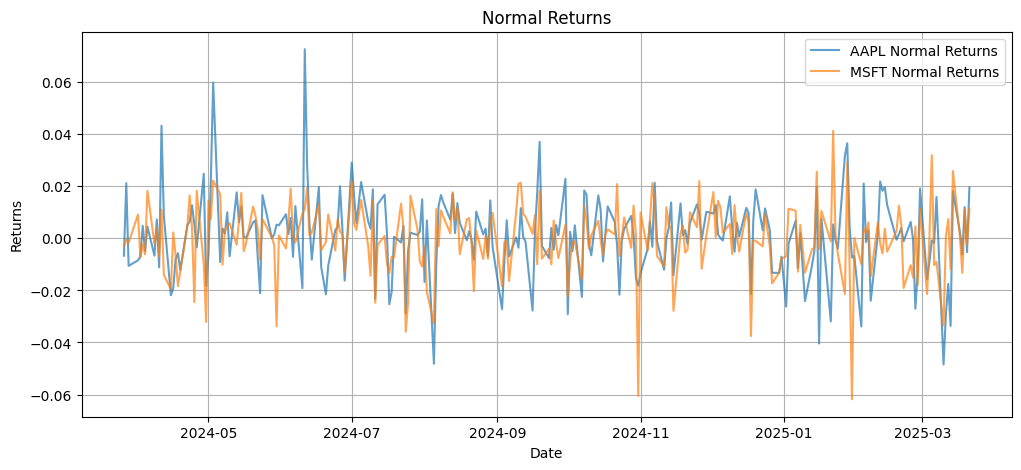

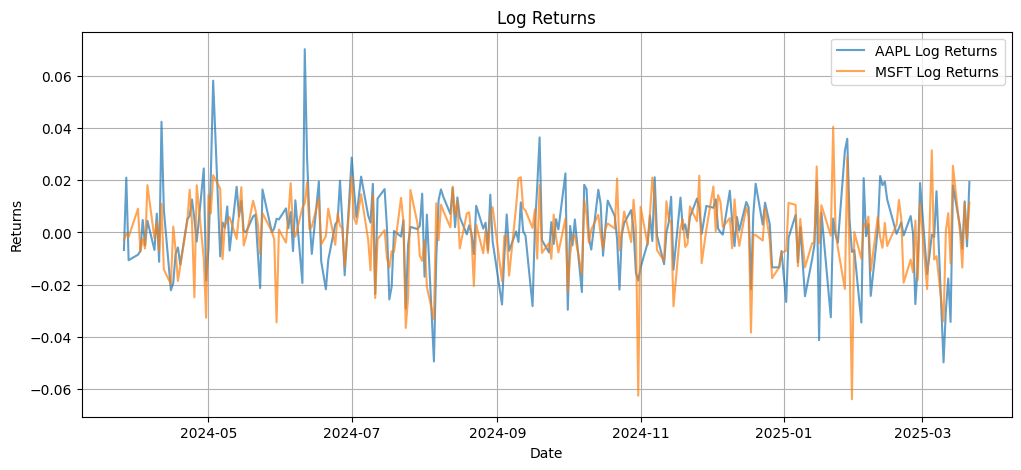

In [48]:
# Normal Returns (AAPL vs MSFT)
plt.figure(figsize=(12, 5))
plt.plot(aapl['normal_returns'], label='AAPL Normal Returns', alpha=0.7)
plt.plot(msft['normal_returns'], label='MSFT Normal Returns', alpha=0.7)
plt.legend()
plt.title("Normal Returns")
plt.xlabel("Date")
plt.ylabel("Returns")
plt.grid()
plt.show()

# Log Returns (AAPL vs MSFT)
plt.figure(figsize=(12, 5))
plt.plot(aapl['log_returns'], label='AAPL Log Returns', alpha=0.7)
plt.plot(msft['log_returns'], label='MSFT Log Returns', alpha=0.7)
plt.legend()
plt.title("Log Returns")
plt.xlabel("Date")
plt.ylabel("Returns")
plt.grid()
plt.show()


In [55]:
msft_volatility = msft['normal_returns'].std() * np.sqrt(249)
aapl_volatility = aapl['normal_returns'].std() * np.sqrt(249)
print(f"MSFT Volatility: {msft_volatility} \nAAPL Volatility: {aapl_volatility}")

MSFT Volatility: 0.2131718750647854 
AAPL Volatility: 0.2445915545052887


In [69]:
msft_mean = np.mean(msft['msft'])
aapl_mean = np.mean(aapl['aapl'])
w1 = msft_mean / (msft_mean + aapl_mean)
w2 = aapl_mean / (msft_mean + aapl_mean)
weights = np.array([w1, w2])
weights

array([0.65846334, 0.34153666])

In [64]:
returns = pd.concat([msft['normal_returns'], aapl['normal_returns']], axis = 1)

In [65]:
returns

,normal_returns,normal_returns
Date,,
2024-03-25,NaN,NaN
2024-03-26,-0.002861,-0.006673
2024-03-27,-0.000522,0.021213
2024-03-28,-0.001685,-0.010559
2024-04-01,0.009151,-0.008456
...,...,...
2025-03-17,0.000360,0.002389
2025-03-18,-0.013327,-0.006121
2025-03-19,0.011212,0.011989


In [70]:
portfolio_volatility = p_volatility(weights, returns)
print(f"Portfolio Volatility: {portfolio_volatility}")

Portfolio Volatility: 0.19403788780267933
